In [98]:
import numpy as np
import scipy as sp
from numpy import linalg as nla
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors

In [99]:
k=0.4032
c=2.3952
p=0.3224
d=0.225423
def model(r,tc):
    x=r[0]
    y=r[1]
    z=r[2]
    a=7.3939+0.002*np.sin(1.8*tc)
    x1=1.0*(p*d*(x*x-a*x)+x*(x+y+c-c*np.tanh(x+z)))
    y1=-1.0*p*d*(a*y+x*x)
    z1=d*(k-z-0.5*x)
    return (np.array([x1,y1,z1]))

In [100]:
def jac(r,tc):
    x=r[0]
    y=r[1]
    z=r[2]
    M=np.array([[-c*np.tanh(x + z) + c + d*p*((-7.3939+0.002*np.sin(1.8*tc)) + 2*x) + x*(-c*(1 - np.tanh(x + z)**2) + 1) + x + y,x,-c*x*(1 - np.tanh(x + z)**2)],
                [-2*x*p*d,-p*d*(7.3939+0.002*np.sin(1.8*tc)),0],
                [-d*0.5,0,-d]])
    return M

In [101]:
def mul(r,tc,g):
    res=np.matmul(jac(r,tc),g)
    return res

In [103]:
%%time

g1=np.array([1,0,0])
tmax=400
h=0.01
t=0
x=-3
y=0
z=0
r=np.array([x,y,z])
talp=0
valt=[]
amp1=[]
valx=[]

# Time loop
while (t<tmax):
    tc=t
    
    #evolution of the perturbations along the Lyapunov directions
    l1=mul(r,tc,g1)
    l2=mul(r,tc,g1+0.5*h*l1)
    l3=mul(r,tc,g1+0.5*h*l2)
    l4=mul(r,tc,g1+h*l3)
    g1=g1+(1.0/6)*h*(l1+2*l2+2*l3+l4)
    
    # Gram-Schmittage
    #1er exposant
    norm=np.linalg.norm(g1)
    alp=np.log(norm)/h
    talp=talp+alp
    g1=g1/norm
    
    # Model time evolution
    k1=model(r,tc)
    k2=model(r+0.5*h*k1,tc)
    k3=model(r+0.5*h*k2,tc)
    k4=model(r+k3*h,tc)
    r=r+(1.0/6)*h*(k1+2*k2+2*k3+k4)
    t=t+h
    
    if (t==87.15000000000768 or t==156.62000000000253 or t==209.82999999995414 or t==211.90999999995225 or t==215.00999999994943 or t==386.52999999979346 or t==395.32999999978546):
        print(r[0],r[1],r[2])
    # Storing the results
    valt.append(t)
    amp1.append(alp)
    valx.append(r[0])
amp1=np.array(amp1)
valt=np.array(valt)

-2.4632393636886345 -0.8278899266995253 1.6432010227294602
-2.3114547224366344 -0.7654090862603016 1.6184734318881504
-0.5032618102223279 -0.24346658976254046 1.2499079842422562
-0.3236937249460866 -0.09173217585075805 1.0022915245785422
-1.1383232841916238 -0.06064051282549149 0.8351242362731193
-1.902085458186659 -0.6682481521786103 1.5719064219604757
-2.1702994991596873 -0.6924257595414277 1.5696764095604834
CPU times: user 7.85 s, sys: 174 ms, total: 8.02 s
Wall time: 8.33 s


In [65]:
tmax=400
h=0.01
x2=-2.4632393636886345
y2=-0.8278899266995253
z2=1.6432010227294602
result=[]
for i in range(10):
    t2=87.15
    valx2=[x2]
    valt2=[t2]
    xi=x2+np.random.uniform(-0.001,0.001)
    r2=np.array([xi,y2,z2])
    while (t2<tmax):
        k1=model(r2,tc)
        k2=model(r2+0.5*h*k1,tc)
        k3=model(r2+0.5*h*k2,tc)
        k4=model(r2+k3*h,tc)
    
        r2=r2+(1.0/6)*h*(k1+2*k2+2*k3+k4)
        valx2.append(r2[0])
        t2=t2+h
        valt2.append(t2) 
    result.append(valx2)

<IPython.core.display.Javascript object>


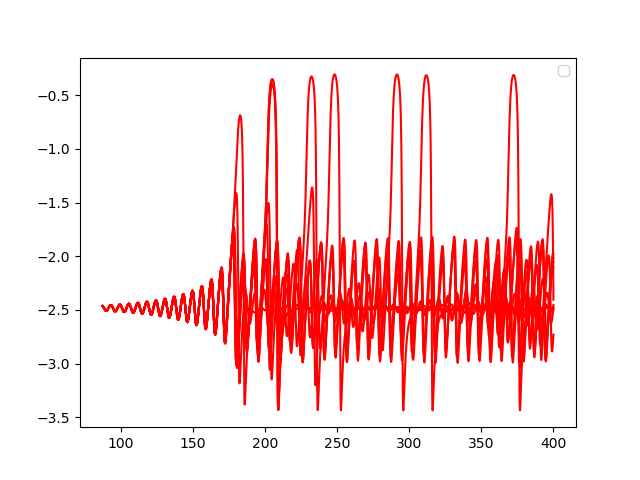

No handles with labels found to put in legend.


In [67]:
%matplotlib notebook
fig = plt.figure()
for i in range(10):
    plt.plot(valt2, result[i],'r-')
plt.legend()

plt.show()

In [80]:
tmax3=600
h=0.01
x3=-2.3114547224366344
y3=-0.7654090862603016
z3=1.6184734318881504
result3=[]
for i in range(10):
    t3=156.62
    valx3=[x3]
    valt3=[t3]
    xi3=x3+np.random.uniform(-0.001,0.001)
    r3=np.array([xi3,y3,z3])
    while (t3<tmax3):
        k1=model(r3,tc)
        k2=model(r3+0.5*h*k1,tc)
        k3=model(r3+0.5*h*k2,tc)
        k4=model(r3+k3*h,tc)
    
        r3=r3+(1.0/6)*h*(k1+2*k2+2*k3+k4)
        valx3.append(r3[0])
        t3=t3+h
        valt3.append(t3) 
    result3.append(valx3)

<IPython.core.display.Javascript object>


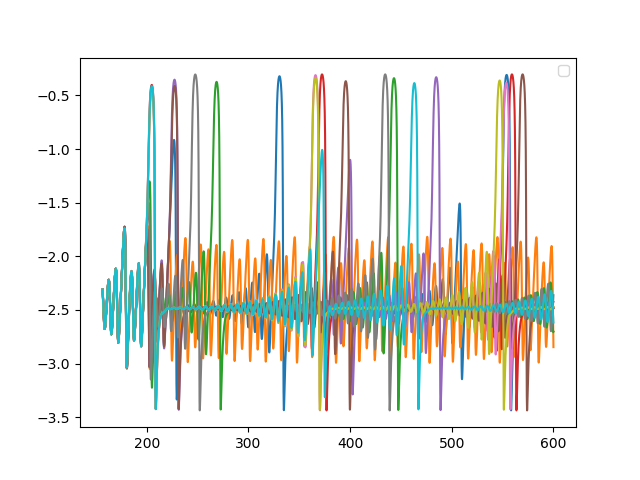

No handles with labels found to put in legend.


In [82]:
%matplotlib notebook
fig = plt.figure()
for i in range(10):
    plt.plot(valt3, result3[i])
plt.legend()

plt.show()

<IPython.core.display.Javascript object>


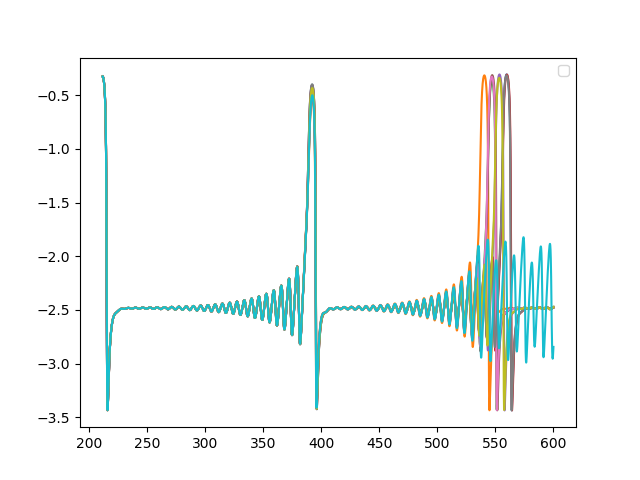

No handles with labels found to put in legend.


In [84]:
tmax4=600
h=0.01
x4=-0.3236937249460866
y4=-0.09173217585075805
z4=1.0022915245785422
result4=[]
for i in range(10):
    t4=211.91
    valx4=[x4]
    valt4=[t4]
    xi4=x4+np.random.uniform(-0.001,0.001)
    r4=np.array([xi4,y4,z4])
    while (t4<tmax4):
        k1=model(r4,tc)
        k2=model(r4+0.5*h*k1,tc)
        k3=model(r4+0.5*h*k2,tc)
        k4=model(r4+k3*h,tc)
    
        r4=r4+(1.0/6)*h*(k1+2*k2+2*k3+k4)
        valx4.append(r4[0])
        t4=t4+h
        valt4.append(t4) 
    result4.append(valx4)

%matplotlib notebook
fig = plt.figure()
for i in range(10):
    plt.plot(valt4, result4[i])
plt.legend()

plt.show()

<IPython.core.display.Javascript object>


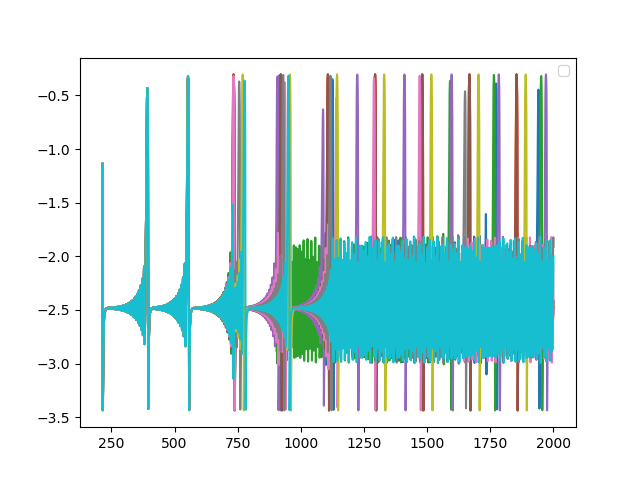

No handles with labels found to put in legend.


In [93]:
tmax5=2000
h=0.01
x5=-1.1383232841916238 
y5=-0.06064051282549149 
z5=0.8351242362731193
result5=[]
for i in range(10):
    t5=215
    valx5=[x5]
    valt5=[t5]
    xi5=x5+np.random.uniform(-0.001,0.001)
    r5=np.array([xi5,y5,z5])
    while (t5<tmax5):
        k1=model(r5,tc)
        k2=model(r5+0.5*h*k1,tc)
        k3=model(r5+0.5*h*k2,tc)
        k4=model(r5+k3*h,tc)
    
        r5=r5+(1.0/6)*h*(k1+2*k2+2*k3+k4)
        valx5.append(r5[0])
        t5=t5+h
        valt5.append(t5) 
    result5.append(valx5)

%matplotlib notebook
fig = plt.figure()
for i in range(10):
    plt.plot(valt5, result5[i])
plt.legend()

plt.show()

<IPython.core.display.Javascript object>


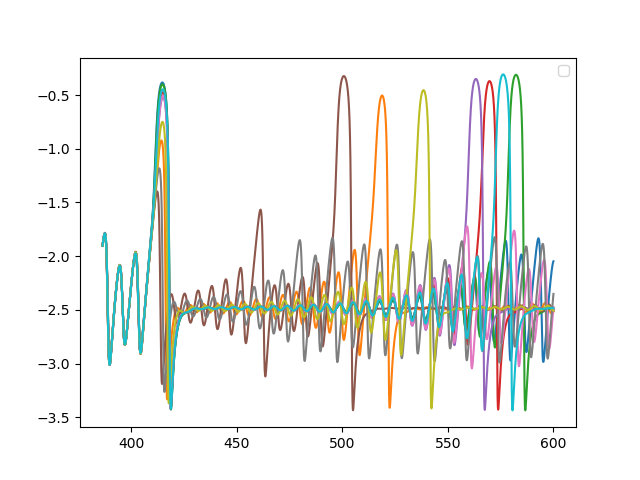

No handles with labels found to put in legend.


In [88]:
tmax6=600
h=0.01
x6=-1.902085458186659  
y6=-0.6682481521786103
z6=1.5719064219604757
result6=[]
for i in range(10):
    t6=386.53
    valx6=[x6]
    valt6=[t6]
    xi6=x6+np.random.uniform(-0.001,0.001)
    r6=np.array([xi6,y6,z6])
    while (t6<tmax6):
        k1=model(r6,tc)
        k2=model(r6+0.5*h*k1,tc)
        k3=model(r6+0.5*h*k2,tc)
        k4=model(r6+k3*h,tc)
    
        r6=r6+(1.0/6)*h*(k1+2*k2+2*k3+k4)
        valx6.append(r6[0])
        t6=t6+h
        valt6.append(t6) 
    result6.append(valx6)

%matplotlib notebook
fig = plt.figure()
for i in range(10):
    plt.plot(valt6, result6[i])
plt.legend()

plt.show()

In [ ]:
-0.5032618102223279 -0.24346658976254046 1.2499079842422562

<IPython.core.display.Javascript object>


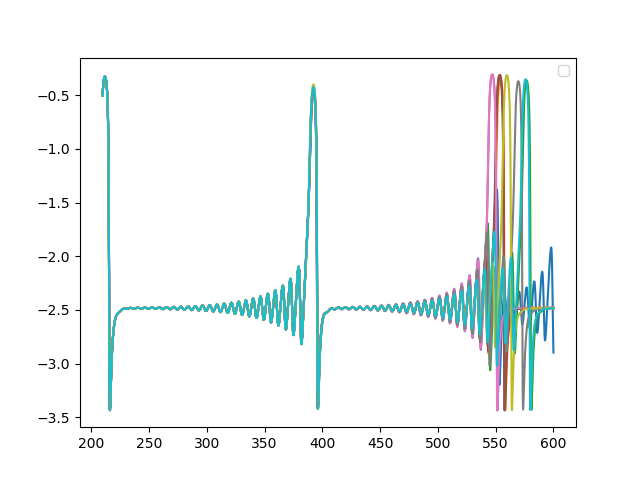

No handles with labels found to put in legend.


In [97]:
tmax7=600
h=0.01
x7=-0.5032618102223279
y7=-0.24346658976254046
z7=1.2499079842422562
result7=[]
for i in range(10):
    t7=209.82
    valx7=[x7]
    valt7=[t7]
    xi7=x7+np.random.uniform(-0.001,0.001)
    r7=np.array([xi7,y7,z7])
    while (t7<tmax7):
        k1=model(r7,tc)
        k2=model(r7+0.5*h*k1,tc)
        k3=model(r7+0.5*h*k2,tc)
        k4=model(r7+k3*h,tc)
    
        r7=r7+(1.0/6)*h*(k1+2*k2+2*k3+k4)
        valx7.append(r7[0])
        t7=t7+h
        valt7.append(t7) 
    result7.append(valx7)

%matplotlib notebook
fig = plt.figure()
for i in range(10):
    plt.plot(valt7, result7[i])
plt.legend()

plt.show()

In [ ]:
-2.1702994991596873 -0.6924257595414277 1.5696764095604834

<IPython.core.display.Javascript object>


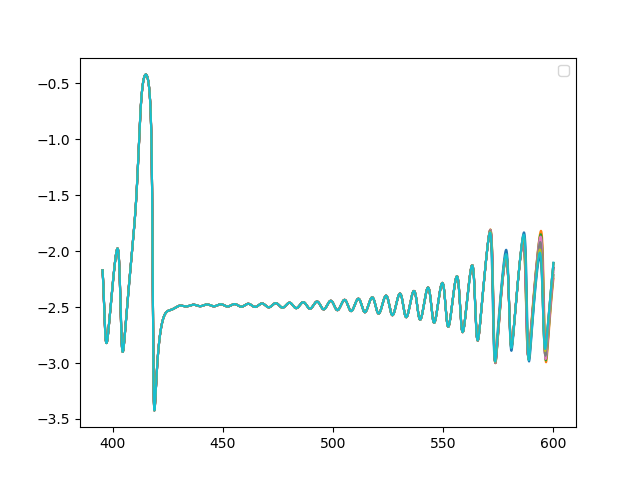

No handles with labels found to put in legend.


In [104]:
tmax8=600
h=0.01
x8=-2.1702994991596873 
y8=-0.6924257595414277 
z8=1.5696764095604834
result8=[]
for i in range(10):
    t8=395.33
    valx8=[x8]
    valt8=[t8]
    xi8=x8+np.random.uniform(-0.001,0.001)
    r8=np.array([xi8,y8,z8])
    while (t8<tmax8):
        k1=model(r8,tc)
        k2=model(r8+0.5*h*k1,tc)
        k3=model(r8+0.5*h*k2,tc)
        k4=model(r8+k3*h,tc)
    
        r8=r8+(1.0/6)*h*(k1+2*k2+2*k3+k4)
        valx8.append(r8[0])
        t8=t8+h
        valt8.append(t8) 
    result8.append(valx8)

%matplotlib notebook
fig = plt.figure()
for i in range(10):
    plt.plot(valt8, result8[i])
plt.legend()

plt.show()

<IPython.core.display.Javascript object>


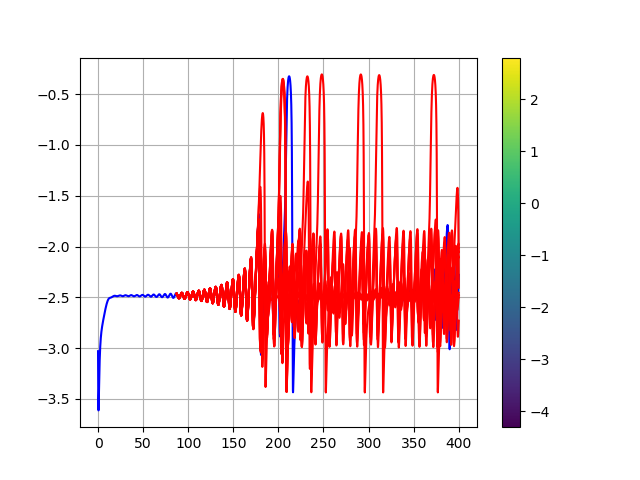

In [75]:
%matplotlib notebook
fig = plt.figure()
plt.plot(valt, valx, 'b')
for i in range(10):
    plt.plot(valt2, result[i],'r-')
fig.colorbar(plot)
plt.grid(True, 'both')
plt.show()